In [6]:
import numpy as np
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio
from pydub import AudioSegment
import noisereduce as nr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import os

In [8]:
test_path = "C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/test"
denoiced_path = "C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/denoised_new"

for files in os.listdir(test_path):
    test_file = os.path.join(test_path, files)
    # Load audio file
    audio = AudioSegment.from_file(test_file)

    # Convert audio to numpy array
    samples = np.array(audio.get_array_of_samples())

    # Reduce noise
    reduced_noise = nr.reduce_noise(samples, sr=audio.frame_rate)
    # Convert reduced noise signal back to audio
    reduced_audio = AudioSegment(
        reduced_noise.tobytes(),
        frame_rate=audio.frame_rate,
        sample_width=audio.sample_width,
        channels=audio.channels,
    )
    new_path = os.path.join(denoiced_path, files)
    # Save reduced audio to file
    reduced_audio.export(new_path, format="wav")

Remove White Noise

c:\Users\nidul\.conda\envs\tf\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)
c:\Users\nidul\.conda\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


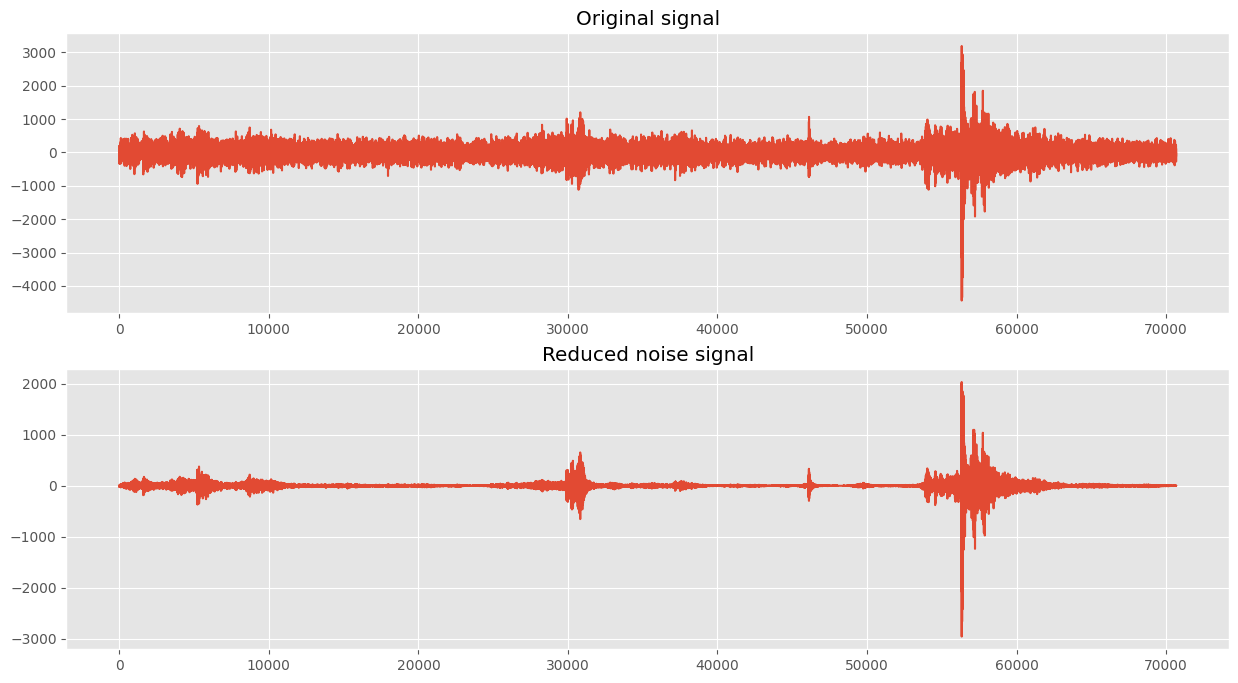

<_io.BufferedRandom name='C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/denoised_new/0a03d7bc7f.wav'>

In [2]:


style.use('ggplot')

# Load audio file
audio = AudioSegment.from_file(r"C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/test/0a03d7bc7f.wav")

# Convert audio to numpy array
samples = np.array(audio.get_array_of_samples())

# Reduce noise
reduced_noise = nr.reduce_noise(samples, sr=audio.frame_rate)

# Plot original and reduced noise signals
fig, ax = plt.subplots(2, 1, figsize=(15,8))
ax[0].set_title("Original signal")
ax[0].plot(samples)
ax[1].set_title("Reduced noise signal")
ax[1].plot(reduced_noise)
plt.show()

# Convert reduced noise signal back to audio
reduced_audio = AudioSegment(
    reduced_noise.tobytes(), 
    frame_rate=audio.frame_rate, 
    sample_width=audio.sample_width, 
    channels=audio.channels
)

# Save reduced audio to file
reduced_audio.export(r'C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/denoised_new/0a03d7bc7f.wav', format="wav")

In [4]:
signal,sr = librosa.load(r"C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/test/0a03d7bc7f.wav")
Audio(data = signal, rate = sr)

In [5]:
denoised_signal,sr = librosa.load(r'C:/Users/nidul/Desktop/ACCA Folder My/Signal processing cup/ROBOVOX_SP_CUP_2024/single-channel/denoised_new/0a03d7bc7f.wav')
Audio(data = denoised_signal, rate = sr)